In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
from scipy import interpolate
from ccfj import GetStationPairs
import pandas as pd
import yaml
import geopandas as gp
import openpyxl
from openpyxl import load_workbook
from concurrent.futures import ThreadPoolExecutor

In [10]:
import sys
sys.path.append(r'../')
from toollib_standard import maplib
from toollib_standard import mathlib
from toollib_standard import filelib
from toollib_standard import stacklib
from toollib_standard import plotlib

In [11]:
with open('a-project_repar.yml', 'r', encoding='utf-8') as f:
    proj = yaml.load(f.read(), Loader=yaml.FullLoader)
name_project = proj['name']
#name_project = 'project_repartrition/repartrition_01-03/'               # Harmon server
name_project

'project_repartrition/output_repar_02-01/'

In [12]:
with open('0_config.yml', 'r', encoding='utf-8') as f:
    dir_config = yaml.load(f.read(), Loader=yaml.FullLoader)
dir_project_workspace = dir_config['dir_project_workspace']
dir_CC_workspace = dir_config['dir_CC_workspace']
print('dir_CC_workspace: ', dir_CC_workspace)
print('dir_project_workspace: ', dir_project_workspace)
dir_project = os.path.join(dir_project_workspace, name_project)
print('dir_project: ', dir_project)

dir_CC_workspace:  /shdisk/rem2/Harmon/F-J/San/
dir_project_workspace:  /shdisk/rem2/Harmon/F-J/San/
dir_project:  /shdisk/rem2/Harmon/F-J/San/project_repartrition/output_repar_02-01/


In [13]:
filename = dir_project+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic = yaml.load(f.read(), Loader=yaml.FullLoader)
filename_bi = dir_project+'Basic_info.npy'
info_basic_bi = np.load(filename_bi, allow_pickle='TRUE').item()      # setting dictionary

In [14]:
name_project_based = info_basic['name_project_based']
dir_project_based = os.path.join(dir_project_workspace, name_project_based)
print('dir_project_based: ', dir_project_based)

dir_project_based:  /shdisk/rem2/Harmon/F-J/San/project/output_FJSJ_17-01/


In [15]:
filename = dir_project_based+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic_based = yaml.load(f.read(), Loader=yaml.FullLoader)
filename_bi = dir_project+'Basic_info.npy'
info_basic_bi_based = np.load(filename_bi, allow_pickle='TRUE').item()      # setting dictionary

In [16]:
key_subworks = info_basic['key_subworks']
key_this = key_subworks[0]
key_this

'0'

In [17]:
key_subworks_based = info_basic_based['key_subworks']
key_subworks_based

['04-02',
 '05-02',
 '06-02',
 '07-02',
 '08-02',
 '09-02',
 '10-02',
 '11-02',
 '12-02',
 '13-02',
 '14-02',
 '15-02',
 '16-02',
 '17-02',
 '18-02',
 '19-02',
 '20-02',
 '21-02',
 '22-02',
 '23-02',
 '24-02',
 '25-02',
 '26-02',
 '27-02',
 '28-02',
 '29-02',
 '30-02',
 '31-02',
 '32-02',
 '33-02',
 '34-02',
 '35-02',
 '36-02',
 '37-02',
 '38-02',
 '39-02',
 '40-02',
 '41-02',
 '42-02',
 '43-02',
 '44-02',
 '45-02',
 '46-02',
 '47-02',
 '48-02',
 '49-02',
 '50-02',
 '51-02',
 '52-02',
 '53-02',
 '54-02',
 '55-02',
 '56-02',
 '57-02',
 '04-03',
 '05-03',
 '06-03',
 '07-03',
 '08-03',
 '09-03',
 '10-03',
 '11-03',
 '12-03',
 '13-03',
 '14-03',
 '15-03',
 '16-03',
 '17-03',
 '18-03',
 '19-03',
 '20-03',
 '21-03',
 '22-03',
 '23-03',
 '24-03',
 '25-03',
 '26-03',
 '27-03',
 '28-03',
 '29-03',
 '30-03',
 '31-03',
 '32-03',
 '33-03',
 '34-03',
 '35-03',
 '36-03',
 '37-03',
 '38-03',
 '39-03',
 '40-03',
 '41-03',
 '42-03',
 '43-03',
 '44-03',
 '45-03',
 '46-03',
 '47-03',
 '48-03',
 '49-03',


### Plot this zone

In [18]:
stalistname = info_basic['stalistname']
stainfo = pd.read_excel(dir_project+stalistname,key_this)
stalist = stainfo['Station'].tolist() 
lat_all =  stainfo['latitude'].tolist() 
lon_all =  stainfo['longitude'].tolist() 

In [19]:
faults = np.load('clark_faults.npy', allow_pickle='TRUE').item()
c_mean = info_basic_bi['c_mean']

In [20]:
lat_this = []
lon_this = []
c_mean_data = []
for key_subwork in info_basic['key_this_'+key_this]:
    key = 'R'+key_subwork[0:2]+key_subwork[3:]
    if key in stalist:
        lat_this.append(lat_all[stalist.index(key)])
        lon_this.append(lon_all[stalist.index(key)])
    else:
        key1 = 'R' + str(int(key_subwork[0:2])-1).zfill(2)+key_subwork[3:5]
        key2 = 'R' + str(int(key_subwork[0:2])+1).zfill(2)+key_subwork[3:5]
        indx1 = stalist.index(key1)
        indx2 = stalist.index(key2)
        lat_this.append((lat_all[indx1]+lat_all[indx2])/2)
        lon_this.append((lon_all[indx1]+lon_all[indx2])/2)
    c_mean_data.append(c_mean[key_subwork])

(-116.59571050040476,
 -116.58720750004738,
 33.534675899739625,
 33.5427740996472)

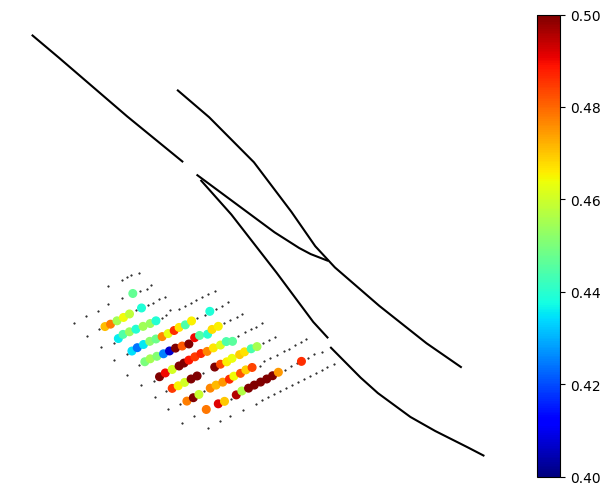

In [21]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
c_min = 0.4
c_max = 0.5
ax.scatter(lon_all, lat_all,marker='.',color='k',s=1)
for i in range(len(faults)):
        ax.plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
#im = ax.scatter(lon_this, lat_this,c=c_mean_data,cmap='Spectral',s=30)
im = ax.scatter(lon_this, lat_this,c= c_mean_data,cmap='jet',s=30,vmin = c_min,vmax = c_max)
plt.colorbar(im)
    
ax.axis('off')

### Calculate all F-J spectrograms' average energy bar

In [22]:
def extract_ds(key_subwork):
    global f
    global c
    global f_range
    global c_range
    global f_new
    global c_new
    global info_basic
    global info_basic_based
    global info_basic_bi_based
    global flag_plot
    global ds_all
    global flag_filter

    dir_ds_based = dir_project_based + info_basic_based['dir_ds']
    ds = h5py.File(dir_ds_based+'ds_'+key_subwork+'.h5', 'r')

    ds_remove = ds['ds_remove'][0]
    ds_new_1 = ds_remove[:,np.logical_and(f>f_range[0],f<f_range[1])]
    ds_new_2 = ds_new_1[np.logical_and(c>c_range[0],c<c_range[1]),:]
    ds_new_2[ds_new_2<flag_filter] = 0
    ds_remove[ds_remove<flag_filter] = 0
    ds_all[key_subwork] = ds_new_2

    if flag_plot == 1:
        fig,ax = plt.subplots(1,2,figsize=(16,6))
        title0 = "Linear stack dispersion curve "
        ax[0] = plotlib.plot_fj(ax[0],ds_remove,title0,f,c,0,c_map='jet')
        ax[1] = plotlib.plot_fj(ax[2],ds_new_2,title0,f_new,c_new,0,c_map='jet')
        plt.savefig(info_basic['dir_proj']+info_basic['dir_image']+'AutoFJ_'+key_subwork+'.png')
        plt.close()

In [23]:
f = info_basic_bi_based['f']
c = np.linspace(info_basic_based['c_min'],info_basic_based['c_max'],info_basic_based['c_num'])

In [24]:
# Defile F-J spectrograms' rage
c_range = [0.3,0.9]
f_range = [8,20]
#c_range = [0.2,2]
#f_range = [0,40]
flag_plot = 0
flag_multiple = 0
flag_filter = 0.75
nThreads = 30

In [25]:
ds_all = {}
f_new = f[np.logical_and(f>f_range[0],f<f_range[1])]
c_new = c[np.logical_and(c>c_range[0],c<c_range[1])]

In [26]:
if flag_multiple ==1:
    pool = ThreadPoolExecutor(max_workers = nThreads)
    for key_subwork in key_subworks_based:
        pool.submit(extract_ds,key_subwork)
    pool.shutdown()
else:
    for key_subwork in key_subworks_based:
        extract_ds(key_subwork)

In [27]:
ds_average = np.zeros([c_new.shape[0],f_new.shape[0]])
num_ds = 0
for key_subwork in key_subworks_based:
    num_ds += 1
    ds_average += ds_all[key_subwork]
ds_average /= num_ds
for i in range(len(f_new)):
    ds_average[:,i] /= np.max(np.abs(ds_average[:,i]))
ds_average[ds_average<flag_filter] = 0

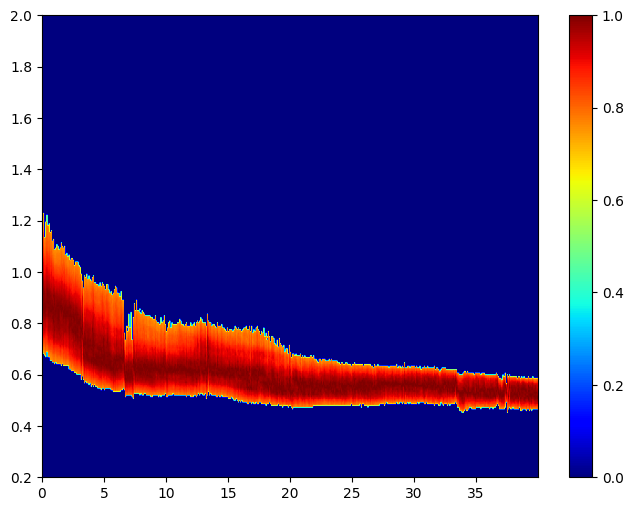

In [28]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
im = ax.imshow(np.flip(ds_average,0),aspect='auto',extent=[min(f),max(f),min(c),max(c)],vmin=0,vmax = 1, cmap = 'jet')
plt.colorbar(im)

### Calculate each spectrograms minus average:

In [29]:
ds_minus = {}
for key_subwork in key_subworks_based:
    ds_minus[key_subwork] = np.abs(ds_all[key_subwork] - ds_average)

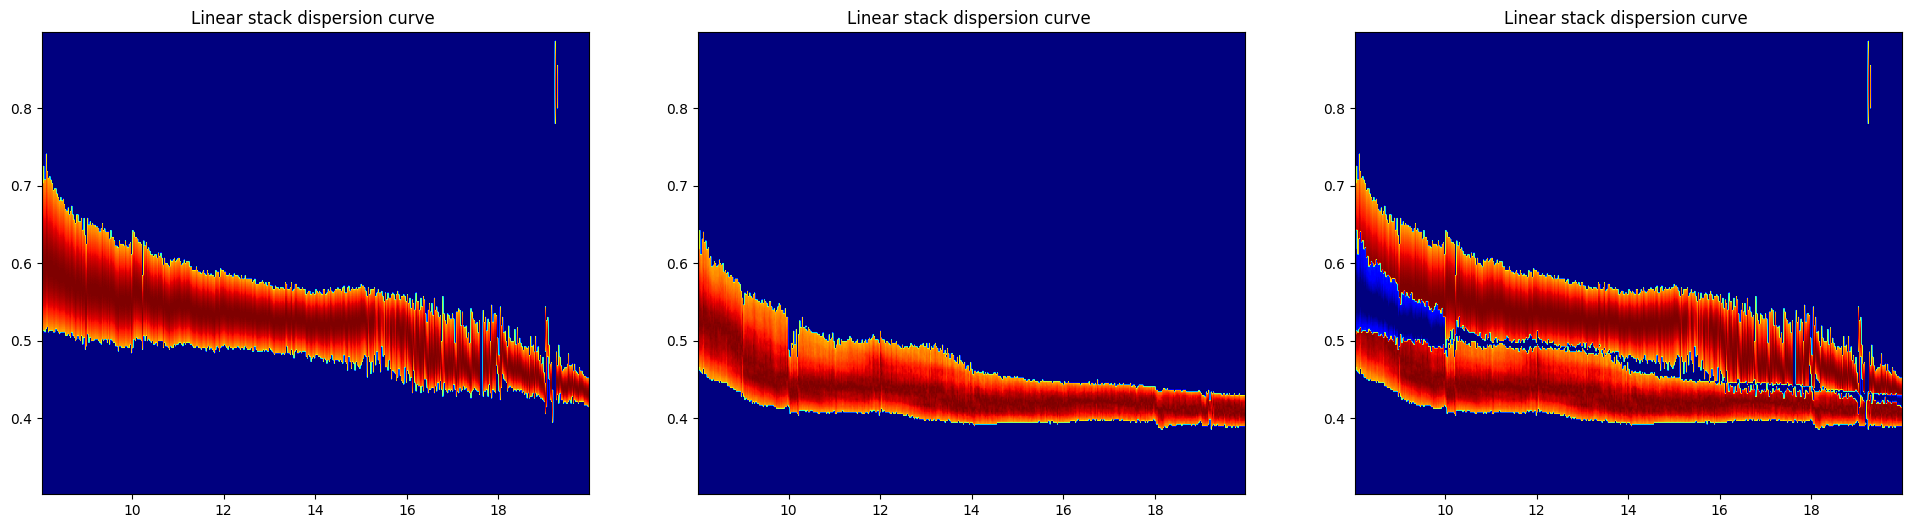

In [30]:

key_subwork = key_subworks_based[300]
fig,ax = plt.subplots(1,3,figsize=(24,6))
title0 = "Linear stack dispersion curve "
ax[0] = plotlib.plot_fj(ax[0],ds_all[key_subwork],title0,f_new,c_new,0,c_map='jet')
ax[1] = plotlib.plot_fj(ax[1],ds_average,title0,f_new,c_new,0,c_map='jet')
ax[2] = plotlib.plot_fj(ax[2],ds_minus[key_subwork],title0,f_new,c_new,0,c_map='jet')


In [31]:
res = []
for key_subwork in info_basic['key_this_'+key_this]:
    res.append(np.sum(ds_minus[key_subwork]))
res_mean = np.mean(res)
res -= res_mean
res /= np.max(np.abs(res))

(-116.59571050040476,
 -116.58720750004738,
 33.534675899739625,
 33.5427740996472)

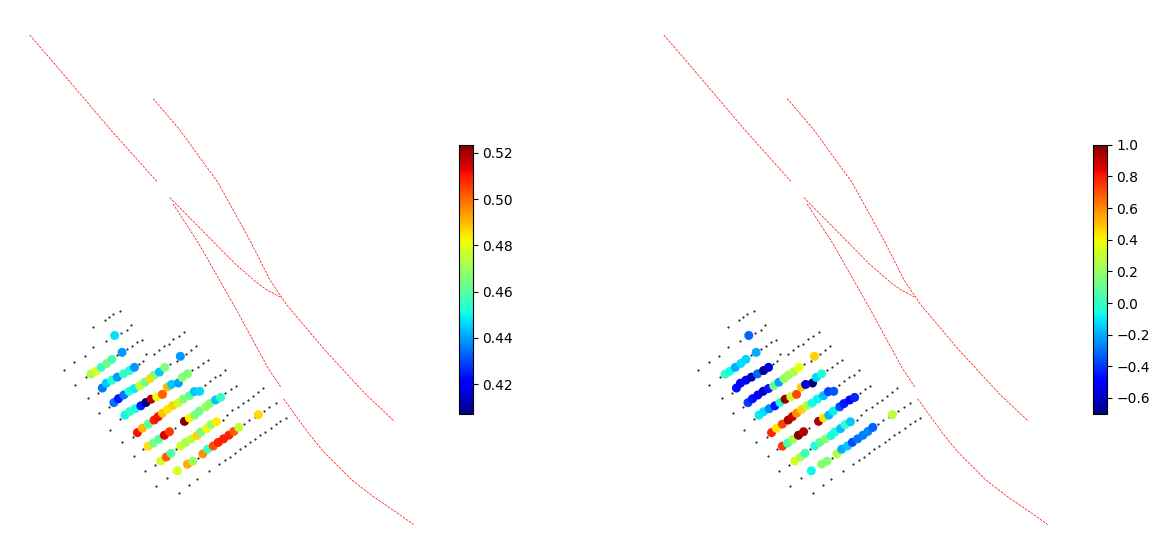

In [32]:
fig = plt.figure(figsize=(15, 7))
ax00 =plt.subplot(1,2,1)
plt.scatter(lon_all, lat_all,marker='.',color='k',s=1)
for i in range(len(faults)):
    plt.plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'r--',lw = 0.5)
im = plt.scatter(lon_this, lat_this,c=c_mean_data,cmap='jet',s=30)
#im = plt.scatter(lon_this, lat_this,c=c_mean_data,cmap='jet',s=30,vmin = c_min,vmax = c_max)
plt.colorbar(im,ax = ax00,shrink=0.5)
plt.axis('off')

ax01 =plt.subplot(1,2,2)
plt.scatter(lon_all, lat_all,marker='.',color='k',s=1)
for i in range(len(faults)):
    plt.plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'r--',lw = 0.5)
im = plt.scatter(lon_this, lat_this,c=res,cmap='jet',s=30)
#im = plt.scatter(lon_this, lat_this,c=res,cmap='jet',s=30,vmin = c_min,vmax = c_max)
plt.colorbar(im,ax = ax01,shrink=0.5)
plt.axis('off')
